In [1]:
import numpy as np
import pylab as plt
import networkx as nx

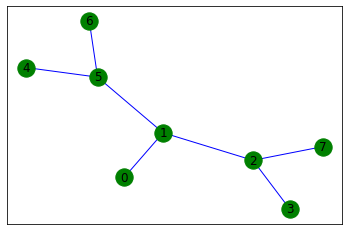

In [13]:
points = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2), (2, 3), (2, 7)]

goal = 7
map = {0: 'Start', 1: '1', 2: '2', 3: '3',
           4: '4', 5: '5', 6: '6', 7: '7-Destination'}
g= nx.Graph()
g.add_edges_from(points)
pos = nx.spring_layout(g, k=.5, center=points[2])
nx.draw_networkx_nodes(g, pos, node_color='g')
nx.draw_networkx_edges(g, pos, edge_color='b')
nx.draw_networkx_labels(g, pos)
plt.show()


num_points = 8

In [4]:
r = np.matrix(np.ones(shape=(num_points, num_points)))
r *= -1

for i in points:
    print(i)
    if i[1] == goal:
        r[i] = 150
    else:
        r[i] = 0

    if i[0] == goal:
        r[i[::-1]] = 150
    else:
        # reverse of point
        r[i[::-1]] = 0


r[goal, goal] = 150
r


Q = np.matrix(np.zeros([num_points, num_points]))

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [10]:
x = 0.8

initial_state = 1


def available_actions(state):
    current_state = r[state, ]
    act = np.where(current_state >= 0)[1]
    return act


av_act = available_actions(initial_state)


def sample_next_action(av_actions_range):
    next_action = int(np.random.choice(av_act, 1))
    return next_action


action = sample_next_action(av_act)


def update(Cstate, action, x):
    max_index = (np.where(Q[action, ] == np.max(Q[action, ]))[1])
    if (max_index.shape[0] > 1):
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)

    max_value = Q[action, max_index]
    Q[Cstate, action] = r[Cstate, action] + x * max_value
    print('max_value', r[Cstate, action] + x * max_value)

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)


update(initial_state, action, x)


scores = []

for i in range(700):
    Cstate = np.random.randint(0, int(Q.shape[0]))
    av_act = available_actions(Cstate)
    action = sample_next_action(av_act)
    score = update(Cstate, action, x)
    scores.append(score)
    print('Score:', str(score))

    print("Trained Q matrix:")
    print(Q/np.max(Q)*100)

max_value 0.0
max_value 0.0
Score: 0
Trained Q matrix:
[[nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]]
max_value 150.0
Score: 100.0
Trained Q matrix:
[[  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 100.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]
max_value 0.0
Score: 100.0
Trained Q matrix:
[[  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 100.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in true_divide



max_value 61.44000000000001
Score: 726.6772181647372
Trained Q matrix:
[[  0.          61.7946188    0.           0.           0.
    0.           0.           0.        ]
 [ 49.43569504   0.          77.24327351   0.           0.
   10.86730843   0.           0.        ]
 [  0.          61.7946188    0.          61.7946188    0.
    0.           0.          96.55409188]
 [  0.           0.          77.24327351   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   10.86730843   0.           0.        ]
 [  0.          13.58413554   0.           0.           8.69384674
    0.           8.69384674   0.        ]
 [  0.           0.           0.           0.           0.
   10.86730843   0.           0.        ]
 [  0.           0.          77.24327351   0.           0.
    0.           0.         100.        ]]
max_value 76.80000000000001
Score: 726.6772181647372
Trained Q matrix:
[[  0.          61.7946188    0.        

max_value 594.1892756167816
Score: 977.5958695465206
Trained Q matrix:
[[  0.          64.           0.           0.           0.
    0.           0.           0.        ]
 [ 51.2          0.          80.           0.           0.
   50.47829149   0.           0.        ]
 [  0.          63.09786436   0.          64.           0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   50.47829149   0.           0.        ]
 [  0.          63.09786436   0.           0.          40.38263319
    0.          40.38263319   0.        ]
 [  0.           0.           0.           0.           0.
   50.47829149   0.           0.        ]
 [  0.           0.          80.           0.           0.
    0.           0.         100.        ]]
max_value 374.9207431512212
Score: 977.5958695465206
Trained Q matrix:
[[  0.          64.           0.         

max_value 478.4767534672857
Score: 981.2713002186941
Trained Q matrix:
[[  0.          63.90072613   0.           0.           0.
    0.           0.           0.        ]
 [ 51.1205809    0.          79.87590766   0.           0.
   51.1205809    0.           0.        ]
 [  0.          63.90072613   0.          63.70683184   0.
    0.           0.         100.        ]
 [  0.           0.          79.87590766   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.1205809    0.           0.        ]
 [  0.          63.90072613   0.           0.          40.89646472
    0.          40.89646472   0.        ]
 [  0.           0.           0.           0.           0.
   51.1205809    0.           0.        ]
 [  0.           0.          79.87590766   0.           0.
    0.           0.          99.95931399]]
max_value 599.0251222190628
Score: 981.3953925614679
Trained Q matrix:
[[  0.          63.90072613   0.         

Most efficient path:
[0, 1, 2, 7]


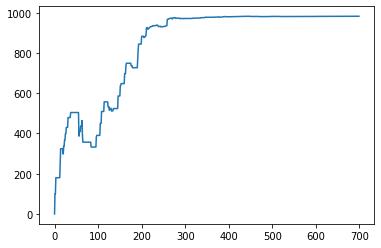

In [12]:
current_state = 0
step = [current_state]

while current_state != 7:

    next_step = np.where(
        Q[current_state, ] == np.max(Q[current_state, ]))[1]

    if next_step.shape[0] > 1:
        next_step = int(np.random.choice(next_step, size=1))
    else:
        next_step = int(next_step)

    step.append(next_step)
    current_state = next_step


print("Most efficient path:")
print(step)

plt.plot(scores)
plt.show()